# 1. Prepare Enviorment
****
## a. Import Packages and libs

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as LinearReg
import pandas as pd
import seaborn as sns

## b. Load Dataset

In [46]:
from sklearn.datasets import load_boston
boston = load_boston()

### b-1. Check dataset Structure

In [47]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [48]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [50]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## c. Transform the data set into a dataframe

In [51]:
df = pd.DataFrame(boston.data , columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


*****
# 2. EDA and Stat
***
## a. Describe of "df" as object of Dataset

In [53]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***
## b. Plots
### Plot-1. Relationship between CRIM and Price

Text(0.5, 1.0, 'Relationship between CRIM and Price')

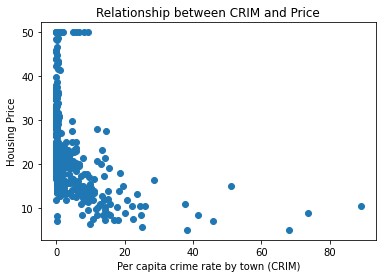

In [54]:
plt.scatter(x = df.CRIM , y = df.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

#Negative Linear relationship, if per capita crime rate by town increases, Housing price will decrease.

### Plot-3. Relationship between AGE and Price

Text(0.5, 1.0, 'Relationship between AGE and Price')

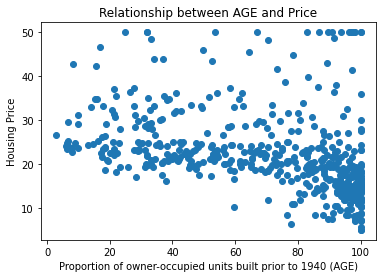

In [55]:
plt.scatter(x = df.AGE , y = df.PRICE)
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

#Negative Linear relationship, if per capita crime rate by town increases, Housing price will decrease.

### Plot-3. Relationship between ZN and Price

Text(0.5, 1.0, 'Relationship between AGE and Price')

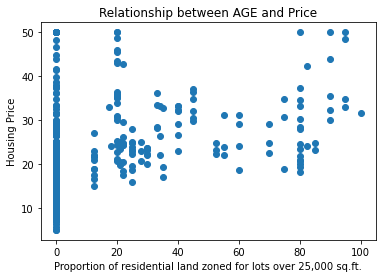

In [56]:
plt.scatter(x = df.ZN , y = df.PRICE)
plt.xlabel("Proportion of residential land zoned for lots over 25,000 sq.ft.")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

#Negative Linear relationship, if per capita crime rate by town increases, Housing price will decrease.

***
## c. Histograms
### c-1. Histogram of each data in Dataset

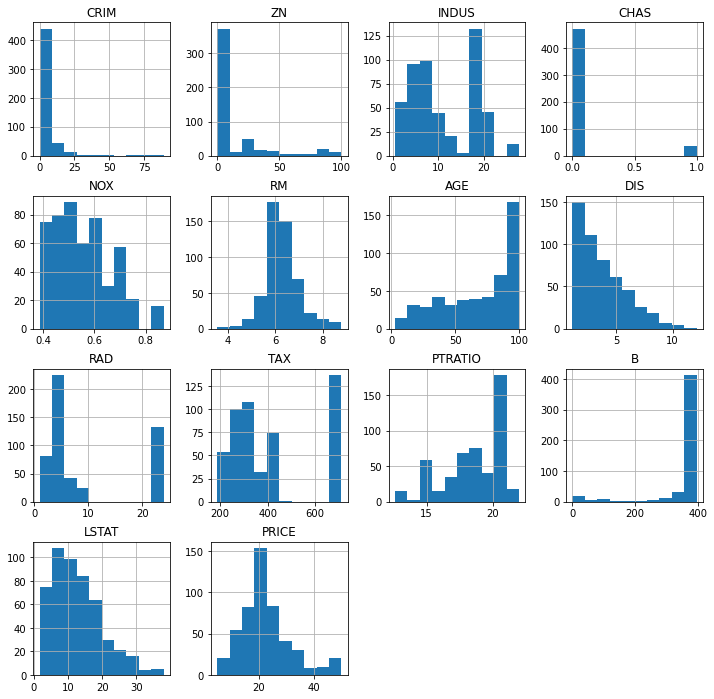

In [57]:
df.hist(figsize=(12,12));

***
## d. Box and Whiskers Plot

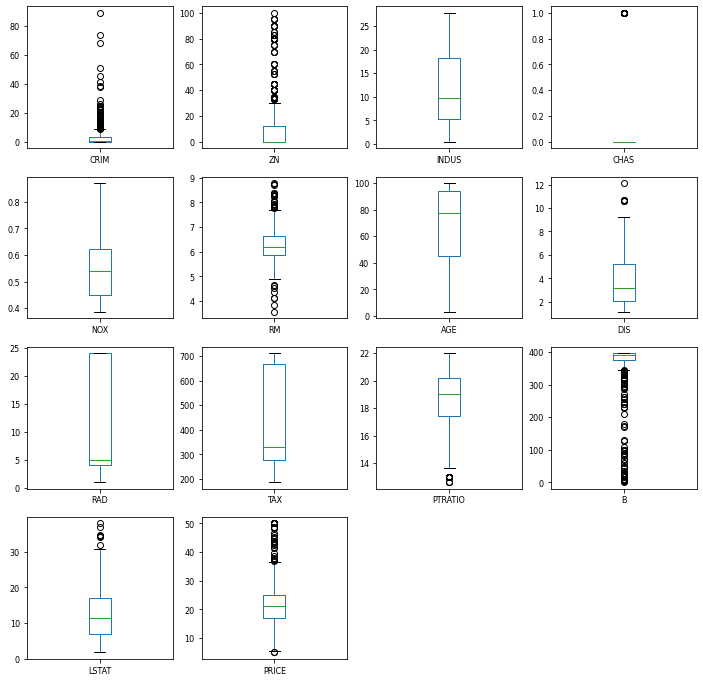

In [58]:
df.plot(kind='box', subplots=True , layout=(4,4) , fontsize=8 , figsize = (12,12));

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


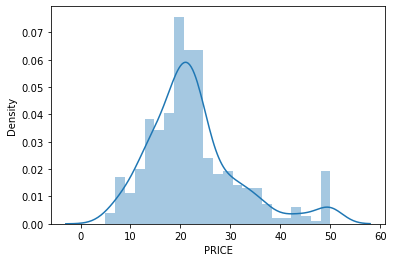

In [59]:
sns.distplot(df['PRICE']);

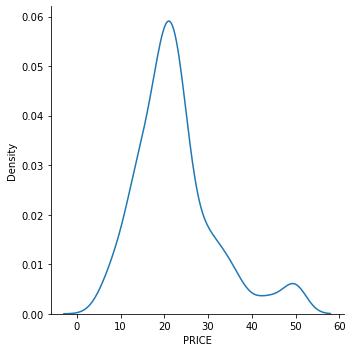

In [60]:
sns.displot(df['PRICE'],kind='kde');

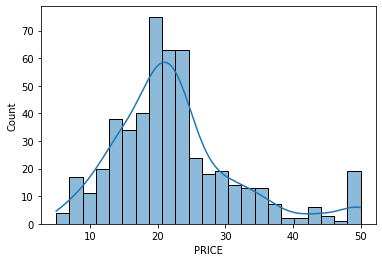

In [61]:
sns.histplot(df['PRICE'],kde=True);

****
# 3. Linear Reg Programming
## Import some more Dependencies

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Intialize the LinearReg model

In [67]:
reg = LinearReg.LinearRegression()

In [69]:
# define x and y values 
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

#split x and y values for train and test
x_train, x_test , y_train , y_test = train_test_split(df_x, df_y, test_size=0.33, random_state= 42)

In [70]:
#Train the model
reg.fit(x_train,y_train)

LinearRegression()

In [71]:
print(reg.coef_)

[[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
  -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
   2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
  -5.47566338e-01]]


In [72]:
#Prediction on test data
y_pred = reg.predict(x_test)
print(y_pred)

[[28.53469469]
 [36.6187006 ]
 [15.63751079]
 [25.5014496 ]
 [18.7096734 ]
 [23.16471591]
 [17.31011035]
 [14.07736367]
 [23.01064388]
 [20.54223482]
 [24.91632351]
 [18.41098052]
 [-6.52079687]
 [21.83372604]
 [19.14903064]
 [26.0587322 ]
 [20.30232625]
 [ 5.74943567]
 [40.33137811]
 [17.45791446]
 [27.47486665]
 [30.2170757 ]
 [10.80555625]
 [23.87721728]
 [17.99492211]
 [16.02608791]
 [23.268288  ]
 [14.36825207]
 [22.38116971]
 [19.3092068 ]
 [22.17284576]
 [25.05925441]
 [25.13780726]
 [18.46730198]
 [16.60405712]
 [17.46564046]
 [30.71367733]
 [20.05106788]
 [23.9897768 ]
 [24.94322408]
 [13.97945355]
 [31.64706967]
 [42.48057206]
 [17.70042814]
 [26.92507869]
 [17.15897719]
 [13.68918087]
 [26.14924245]
 [20.2782306 ]
 [29.99003492]
 [21.21260347]
 [34.03649185]
 [15.41837553]
 [25.95781061]
 [39.13897274]
 [22.96118424]
 [18.80310558]
 [33.07865362]
 [24.74384155]
 [12.83640958]
 [22.41963398]
 [30.64804979]
 [31.59567111]
 [16.34088197]
 [20.9504304 ]
 [16.70145875]
 [20.23215

In [86]:
#Check model Performance
np_meanSqu = np.mean((y_pred - y_test)**2)
sk_meanSqu = mean_squared_error(y_test,y_pred)

In [87]:
print("NP MSE = ", np_meanSqu , "SK MSE = ", sk_meanSqu)

NP MSE =  0    20.724023
dtype: float64 SK MSE =  20.72402343733974
